---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

## Introduction and Motivation
This page focuses on using unsupervised machine learning to learn more about the song data and identify what sets the top 20 songs apart from the other. The code is divided into two sections: dimensionality reduction and clustering. In dimensionality reduction, I want to simply high dimensional data while making sure I keep the relationships between the features. These methods allow for better visualizations that will help us find the structure in the dataset. Clustering will let me group songs based on common characteristics. This can be used to find what's in common between the top performing songs or help users find songs that are a good match with their favorite top 10 or 20 song. Overall, the goal of this page is the find if specific trends or features are indicative of a song's likelihood of success.

## Overview of Methods
Give a concise explanation of the methods used. For example, if using K-Means clustering, describe what it is, how it works, the inputs and outputs, and key hyperparameters.

## Code 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Dimensionality Reduction
The objective of this section is to explore and demonstrate the effectiveness of PCA and t-SNE in reducing the dimensionality of complex data while preserving essential information and improving visualization.

For the dimension reduction algorithms, I wanted to alter the genres that I recorded. Previously, only the first genre was recorded. The following functioln records more general genre categories for each of the genres listed for the song. I will then apply one hot encoding to the lists of the simplified genres so I can use it in a clustering algorithm.

This code then applies the OHE to the data and removes the non numeric columns. This cleans the data so that we can then apply dimensionality reduction and clustering to the data.

In [ ]:
def map_genres_to_categories(genres):
    # Define the mapping of specific genres to broader categories
    genre_mapping = {
        "Pop": [
            "pop", "social media pop", "dance pop", "modern country pop", "gen z singer-songwriter", "colombian pop", 
            "modern indie pop", "power pop", "la pop", "singer-songwriter pop", "uk pop", "alt z"
        ],
        "Indie/Alternative": [
            "indie pop", "modern alternative pop", "indie rock", "small room", "asheville indie", "sacramento indie", 
            "twee pop", "tape club", "bubblegrunge", "bedroom pop", "slacker rock", "irish indie rock", "irish post-punk"
        ],
        "Rock": [
            "album rock", "blues rock", "classic rock", "electric blues", "hard rock", "jam band", "southern rock", 
            "heartland rock", "garage rock", "modern blues rock", "modern rock", "punk blues", "noise rock", "no wave"
        ],
        "Country": [
            "classic texas country", "contemporary country", "country dawn", "country road", "countrygaze", 
            "deep new americana", "roots americana", "classic oklahoma country", "red dirt"
        ],
        "Hip Hop/Rap": [
            "hip hop", "rap", "west coast rap", "pop rap", "melodic rap", "houston rap", "atl hip hop", "trap", 
            "trap queen", "viral rap", "southern hip hop", "dfw rap", "canadian hip hop", "indian underground rap", 
            "desi hip hop", "malayalam hip hop", "irish hip hop", "conscious hip hop"
        ],
        "R&B": [
            "r&b", "alternative r&b", "uk contemporary r&b", "afro r&b"
        ],
        "Latin": [
            "reggaeton", "urbano latino", "trap latino", "reggaeton chileno", "reggaeton colombiano", "latin pop"
        ],
        "Afrobeat/African": [
            "afrobeats", "afropop", "azonto", "nigerian pop", "alte", "nigerian hip hop"
        ],
        "Electronic/Experimental": [
            "art pop", "metropopolis", "ambient folk", "freak folk", "hyperpop", "proto-hyperpop", "bubblegum bass", 
            "digital hardcore", "escape room", "experimental pop", "experimental hip hop", "deconstructed club", 
            "electronica", "glitch", "glitch hop", "jazztronica", "intelligent dance music", "psychedelic hip hop", 
            "wonky", "indietronica", "afrofuturism", "transpop", "uk alternative pop", "crank wave", "jersey club"
        ],
        "K-pop": [
            "k-pop", "k-pop girl group", "anime"
        ],
        "Other": [
            "None Listed"
        ]
    }

    categories = []
    for category, genre_list in genre_mapping.items():
        # Check if any genre in the song's genre list belongs to this category
        if any(genre in genres for genre in genre_list):
            categories.append(category)

    if not categories:  # If no genres match, return "Other"
        categories.append("Other")
    
    return categories

In [ ]:
songs = pd.read_csv('../../data/processed-data/transformed_data.csv')
songs = songs[['Genres', 'Song Popularity' ,'Popularity', 'Explicit', 'Total Artists On Song', 'Duration (ms)_transf', 'Followers_transf', 'Lyrics Word Count_transf', 'neg', 'neu', 'pos', 'compound', 'Ranking Group', 'Top 10 Song']]
songs['Simplified Genre'] = songs['Genres'].apply(map_genres_to_categories)
# One-Hot Encoding the 'Simplified Genre' column
songs_num = songs.drop(columns=['Ranking Group', 'Top 10 Song'])
songs_num_encoded = songs_num['Simplified Genre'].explode().str.get_dummies().groupby(level=0).sum()

# Join the encoded genres back to the original dataframe
songs_num = pd.concat([songs_num, songs_num_encoded], axis=1).drop(columns=['Genres', 'Simplified Genre'])
songs_num.head()

#### PCA (Principal Component Analysis)

The following function for graphing the results of the dimensionality reduction algorithm has been adapted from lab 4.2 from DSAN 5000. The function takes in the converted features and plots the first 2 features against each other in a scatter plot and uses a label to color the plots.

In [96]:
# # UTILITY PLOTTING FUNCTION
def plot_2D(X,color_vector, dim_red_model):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Feature 1 ', ylabel='Feature 2',
    title= dim_red_model + ' results')
    ax.grid()
    plt.show()

This code takes in the songs_num df without the Song Popularity column (I wanted to use this opportunity to see if clusters naturally occur regardless of the song's popularity) and the total artist's on the song (a non standardized column).

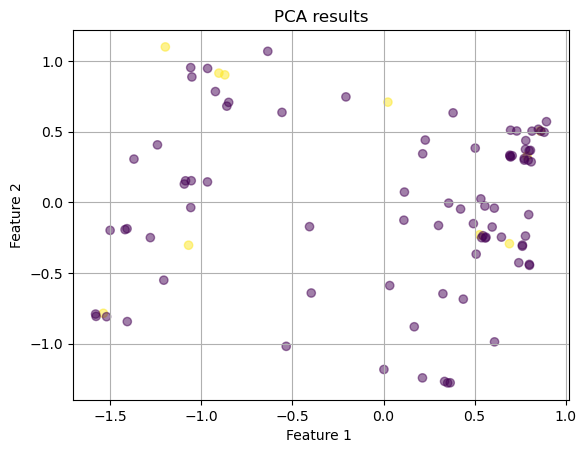

In [97]:
pca = PCA(n_components=10)  # 95% of variance
pca_result = pca.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song']))
ranking_group = songs['Top 10 Song'].astype('category').cat.codes
plot_2D(pca_result, ranking_group, 'PCA')

I colored the points by whether they were a top 10 song or not. I'm not seeing any clustering with those particular songs, but I am seeing two bigger clusters separated by a diagonal line down the middle, which is interesting. I am not sure what these clusters are indicative of, however.

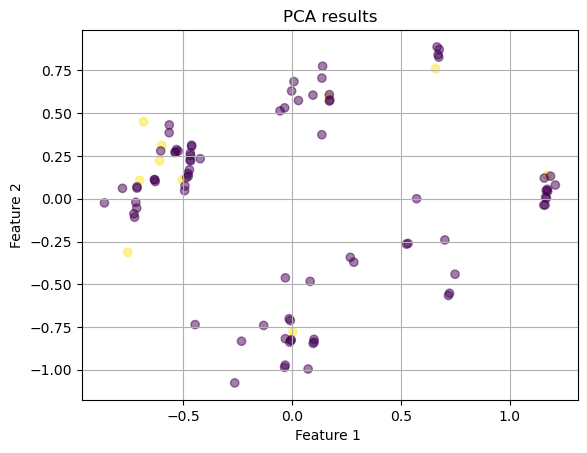

In [83]:
pca1 = PCA(n_components=10)  # 95% of variance
pca_result_1 = pca1.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song', 'compound']))
plot_2D(pca_result_1, ranking_group, 'PCA')

Interestingly, when I remove the compound score from the sentiment analysis (leaving the positive, negative, neutral scores) I get much clearer clusters (still separated by the diagonal line) with all but 2 of the top songs in the top left cluster.

The following code has been adapted from lab 4.2. It takes in a pca model and plots the ratio of explained variance by each principal component. It then plots this.

Variance explained by each principal component:
[0.32070283 0.15954468 0.11482478 0.06969029 0.05864162 0.05514703
 0.04737073 0.03608452 0.0300553  0.02383462]


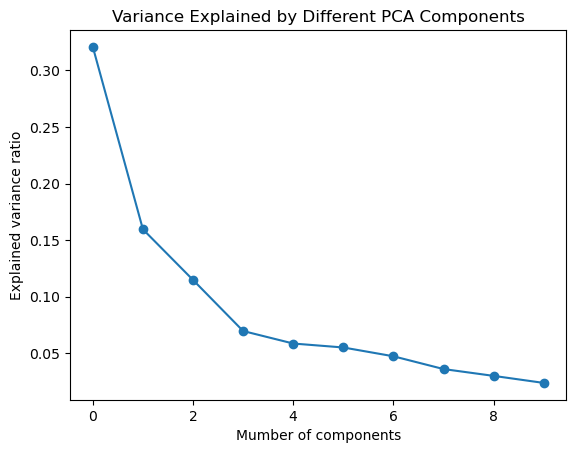

Variance explained by each principal component:
[0.24156774 0.17060014 0.10147743 0.08326044 0.07891062 0.06986966
 0.05186226 0.04267764 0.034445   0.03158158]


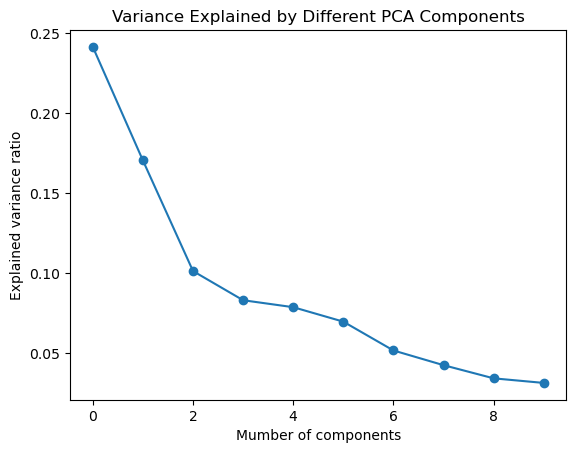

In [99]:
def plot_variance_explained(pca):
    print("Variance explained by each principal component:")
    print(pca.explained_variance_ratio_[0:10])

    plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, '-o')
    plt.xlabel('Mumber of components')
    plt.ylabel('Explained variance ratio')
    plt.title('Variance Explained by Different PCA Components')
    plt.show()

plot_variance_explained(pca)
plot_variance_explained(pca1)

These are two elbow plots showing the ratio of explained variance by each PCA. The first one is for the first model with the elbow point being at 2 components. After this, the explained variance decreases very slowly. For the second one, the elbow point is at either component 2 or 3. Therefore, 2 or 3 components would be optimal for a model.

#### T-SNE

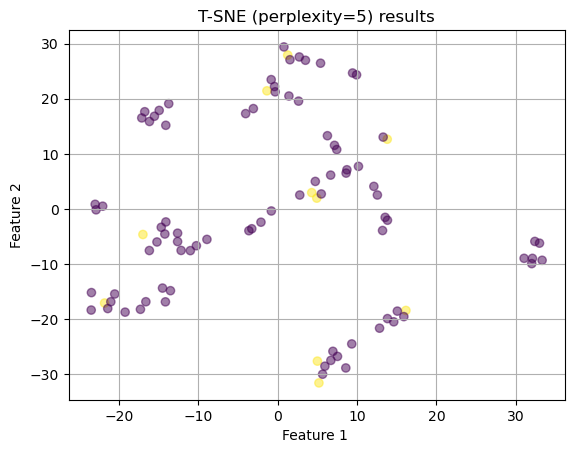

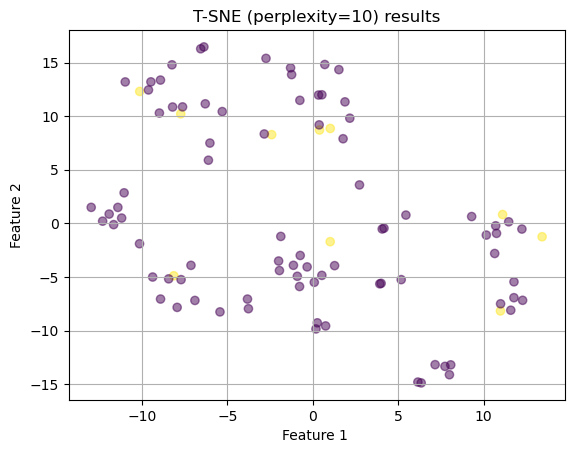

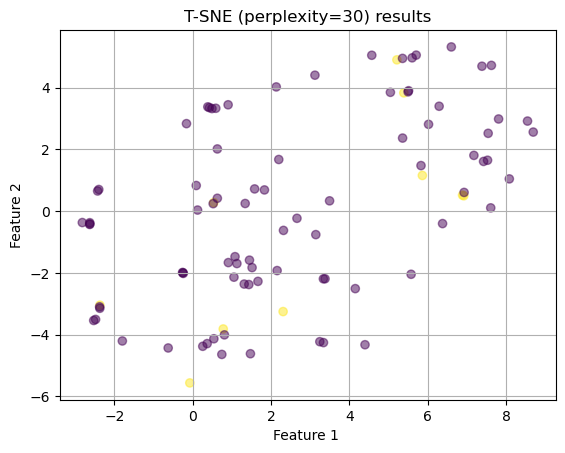

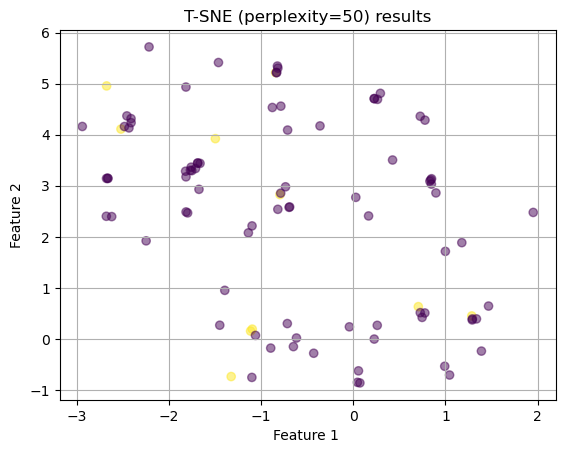

In [88]:
for perplexity in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song']))
    plot_2D(X_tsne, ranking_group, f'T-SNE (perplexity={perplexity})')

After running t-sne with several different perplexity values, I'm not seeing very many clear clusters. The best option is the first one with a perplexity of 5. I will try again taking out the compound score to see if that improves it.

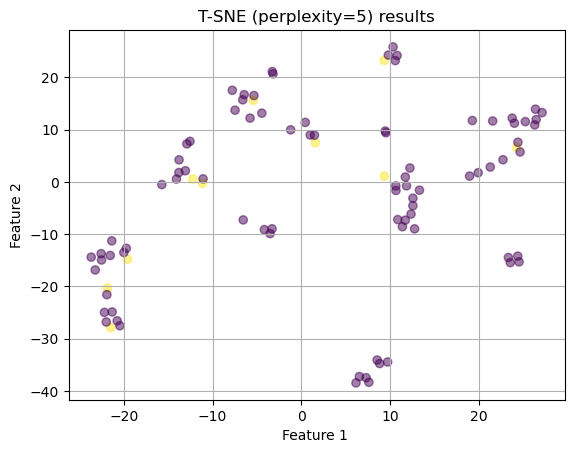

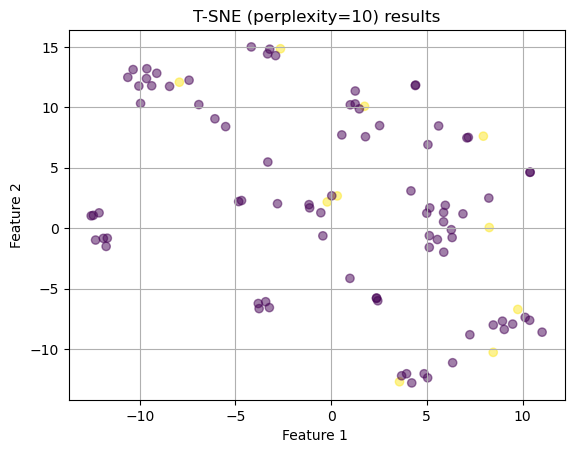

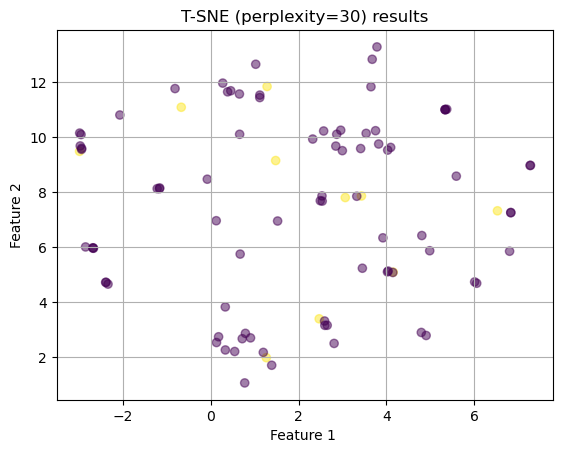

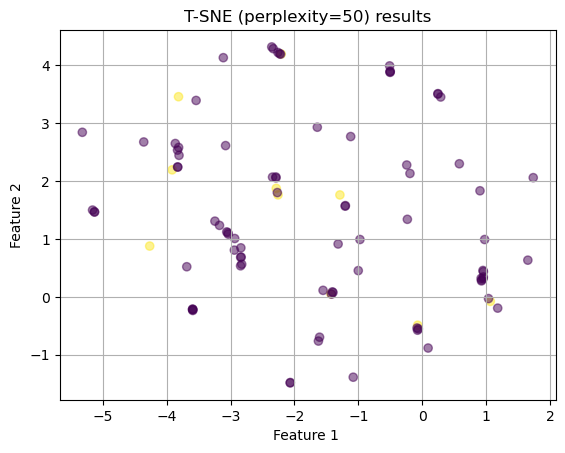

In [89]:
for perplexity in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song', 'compound']))
    plot_2D(X_tsne, ranking_group, f'T-SNE (perplexity={perplexity})')

The above graphs appear to have much clearer clusters. I think the best one is the first one with a perplexity of 5. I see distinct clusters. However, the top-10 songs did not appear to group together.

#### Comparison

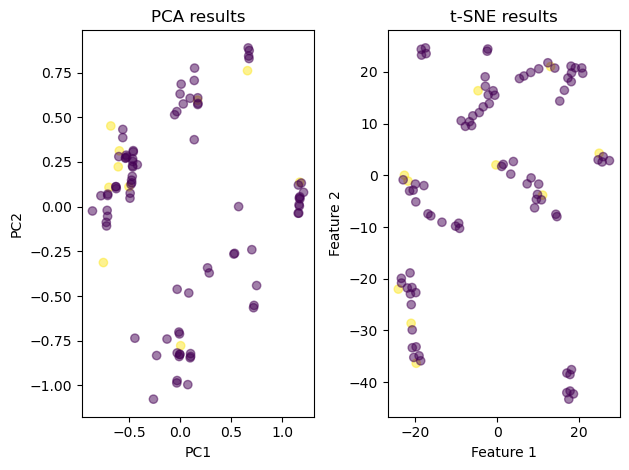

In [100]:
fig, axes = plt.subplots(1, 2)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song', 'compound']))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=ranking_group, alpha=0.5)
axes[0].set_title('PCA results')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# t-SNE
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(songs_num.drop(columns=['Song Popularity', 'Total Artists On Song', 'compound']))
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=ranking_group, alpha=0.5)
axes[1].set_title('t-SNE results')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


I decided to put the two graphs together on the same subplot. This view of both methods shows that T-SNE did a much better job at visualizing clusters. The clusters are closer together and farther apart from each other. However, PCA did a better job of finding the top-10 songs grouped together (other than the 2 outliers) with T-SNE having 1-3 top 10 songs in each cluster.

In terms of preseriving the data structure, the fact that PCA kept the top-10 grouping as well as the characteristics of the method itself of projecting data in directions of max variance, I am led to believe that it does a good job of preserving the overall trends and variance but not as good of a job on a local level. This, instead, is where T-SNE does better. This might mean that T-SNE will do a better job showing groupings between songs (perhaps functioning as a recommendation system). Visually, T-SNE has more distinct clusters compared to PCA. However, the axes in PCA are more informative because they show the features produced with the greatest variance. Also, the PCA graph seems to have some underlying linearity which is intersting.

The tradeoffs between PCA and T-SNE include the interpretability (with PCA results being meaningful interpretations of the data and T-SNE features being more abstract), dimensionality (PCA can have any number of features while T-SNE is limited to 2-3), and visualization (T-SNE has clearer clusters while PCA's are more linear) - Source - ChatGPT.

### Clustering Methods
Apply clustering techniques (K-Means, DBSCAN, and Hierarchical clustering) to a selected dataset. The goal is to understand how each method works, compare their performance, and interpret the results.

1. Clustering Methods:
    - Apply K-Means, DBSCAN, and Hierarchical clustering to your dataset.
    - Write a technical summary for each method (2–4 paragraphs per method) explaining how it works, its purpose, and any model selection methods used (e.g., Elbow, Silhouette).

2. Results Section:
    - Discuss and visualize the results of each clustering analysis.
    - Compare the performance of different clustering methods, noting any insights gained from the analysis.
    - Visualize cluster patterns and how they relate (if at all) to existing labels in the dataset.
    - Use professional, labeled, and clear visualizations that support your discussion.

3. Conclusion:
    - Summarize the key findings and their real-world implications in a non-technical way. Focus on the most important results and how they could apply to practical situations.

## Summary and Interpretation of Results
Summarize your findings, interpret the results, and discuss their technical implications.
